In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.constants import golden
plt.style.use('default')
plt.rc('figure', figsize=((5.0, 5.0 / golden)))

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'ADistance'
gcolors = ['green', 'orange', 'red']
gbins = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
myindex = [
    '0:00', '7:00', '8:00', '9:00', '10:00',
    '11:00', '12:00', '13:00', '14:00',
    '15:00','16:00', '17:00', '18:00',
    '19:00', '20:00', '21:00', '22:00',
    '23:00']

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)

# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
tragitti = tragitti[clean(tragitti)]

hour_length_freq = pd.crosstab(
    index=tragitti['Hour'],
    columns=pd.cut(tragitti[distance_param], bins=gbins))

hour_length_freq.index = myindex
hour_length_freq

ADistance,"(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]","(5.0, 6.0]","(6.0, 7.0]","(7.0, 8.0]","(8.0, 9.0]"
0:00,1852,1552,1133,590,223,82,10
7:00,1819,1509,1180,609,239,68,15
8:00,1763,1643,1077,610,257,68,14
9:00,1771,1553,1165,638,244,76,11
10:00,1710,1688,1081,653,266,88,16
11:00,1762,1616,1137,602,252,67,25
12:00,1808,1596,1185,649,251,82,22
13:00,1837,1680,1076,679,283,71,16
14:00,1869,1625,1131,682,282,72,13
15:00,1864,1591,1181,623,283,72,14


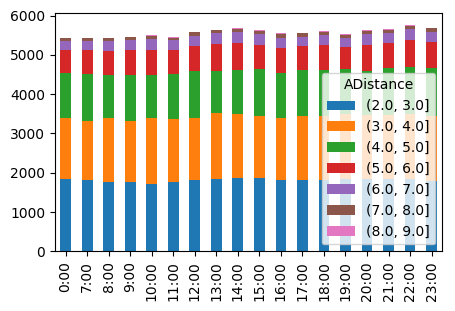

In [3]:
hour_length_freq.plot.bar(stacked=True)
plt.show()

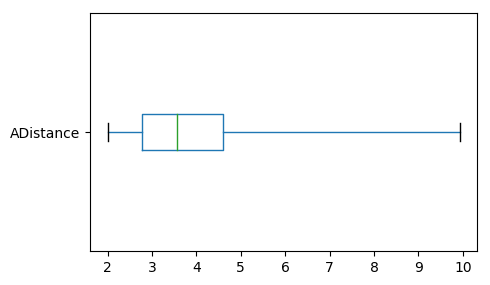

In [4]:
tragitti[distance_param].plot.box(vert=False, whis='range')
plt.show()

In [5]:
length_hour_freq = pd.crosstab(
    index=pd.cut(tragitti[distance_param], bins=gbins),
    columns='%')

(length_hour_freq / sum(length_hour_freq.values)) \
    .apply(lambda p: np.round(p, 4)*100)

col_0,%
ADistance,
"(2.0, 3.0]",32.55
"(3.0, 4.0]",29.10
"(4.0, 5.0]",20.64
"(5.0, 6.0]",11.42
"(6.0, 7.0]",4.58
"(7.0, 8.0]",1.42
"(8.0, 9.0]",0.29


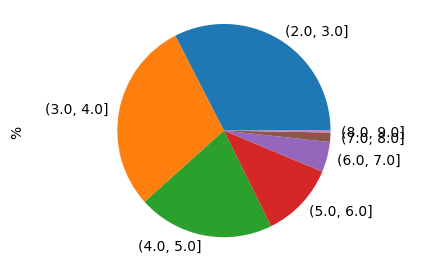

In [6]:
length_hour_freq.plot.pie('%', legend=False)
plt.axis('equal')
plt.show()